# Time Series Project (Sales)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from joblib import dump, load
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
data.to_csv('../data/raw/sales.csv')

In [4]:
data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
data.shape

(366, 2)

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date

In [7]:
data.head()

,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633


In [8]:
data = data.set_index("date")  # establece la columna "date" como el índice del DataFrame
ts = data["sales"]
ts

date
2022-09-03      55.292157
2022-09-04      53.803211
2022-09-05      58.141693
2022-09-06      64.530899
2022-09-07      66.013633
                 ...     
2023-08-30     989.600354
2023-08-31     994.987326
2023-09-01     995.814415
2023-09-02     997.350214
2023-09-03    1000.482785
Name: sales, Length: 366, dtype: float64

In [9]:
ts.to_csv('../data/processed/time-series.csv', index=True)

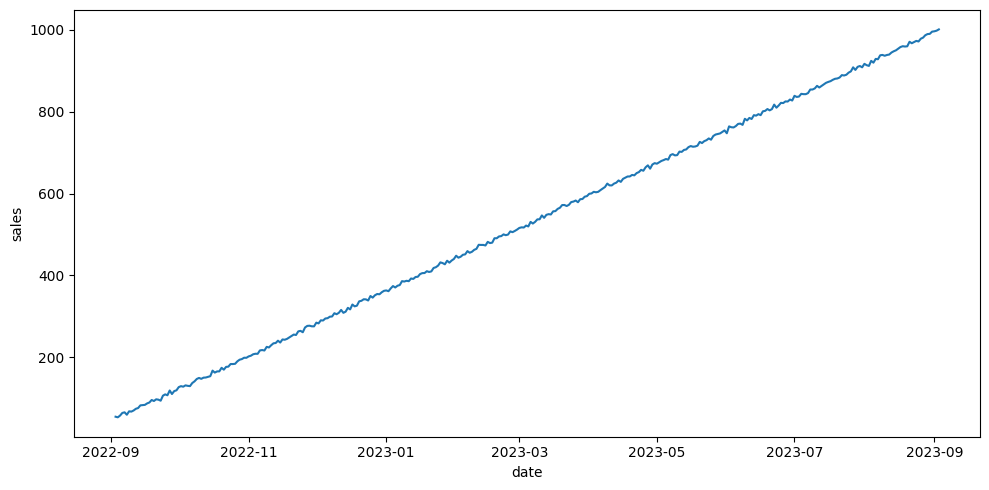

In [10]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()


Time Series Analysis

-The graph shows an upward trend over time. This implies a progressive increase in sales. The slope remains constant.

-Apparently no seasonality is observed in the data, because the slope 

-The variability in the series appears to be relatively low. This suggests consistency in sales over time. There are no outliers in the time series.

-The increase in the number of sales is not regular and there are no variations in the slope, so there are no obvious inflection points.

In [12]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition


Trend Analysis

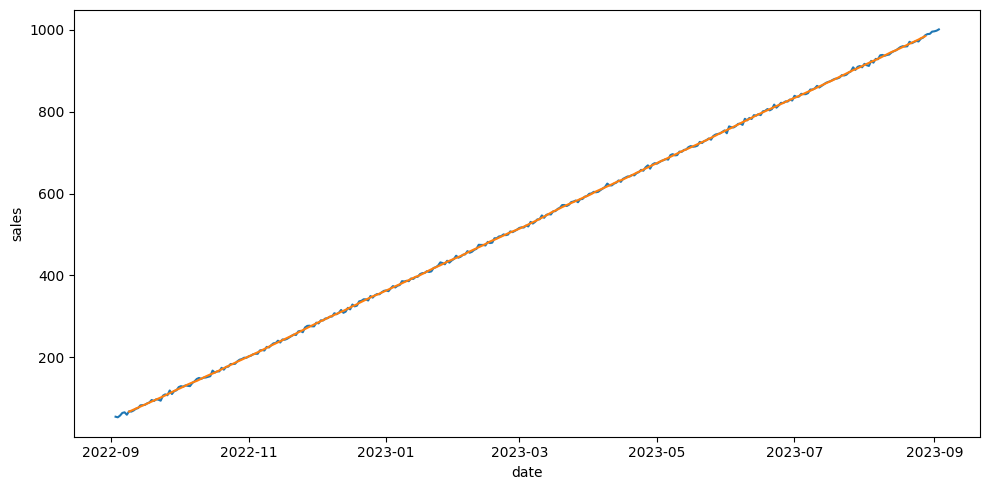

In [13]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()


As the slope of the curve is constant, it grows progressively with the growth trend of the data.


Seasonality analysis

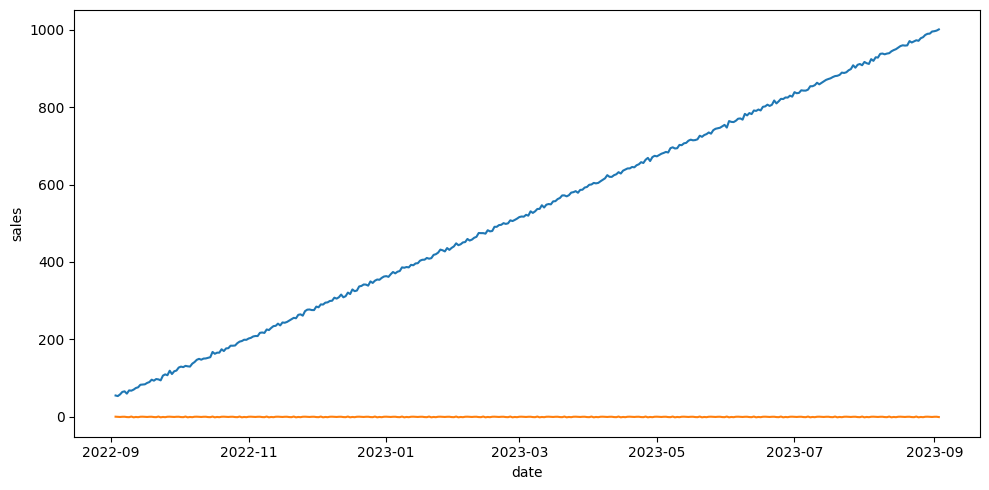

In [14]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [21]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Here we can see that the p-value is greater than 0.05, this means that our null hypothesis will be rejected and we will take this series as non-stationary.


Variability analysis

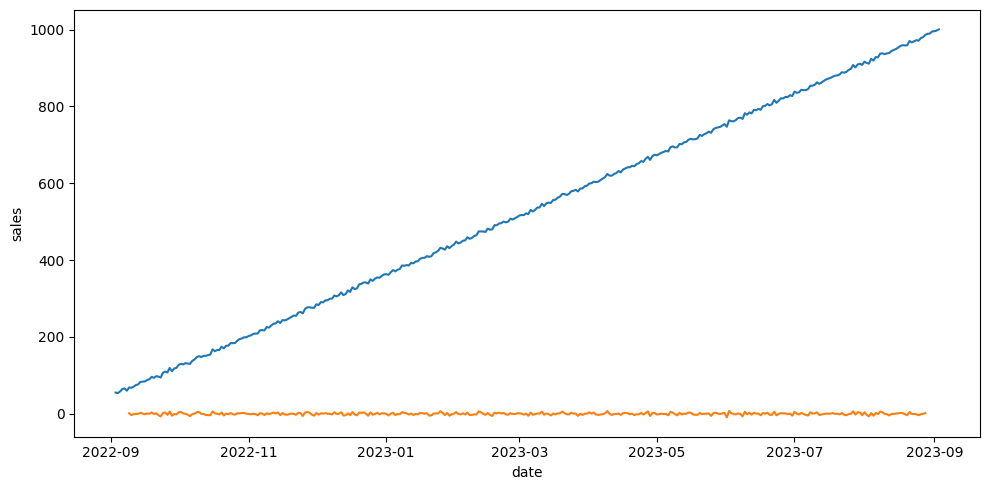

In [22]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Variability is constant: The line parallel to the X axis indicates that the variability of the data remains constant. Although the time series values ​​are increasing over time, the spread or variability around that trend does not change significantly.


Autocorrelation Analysis

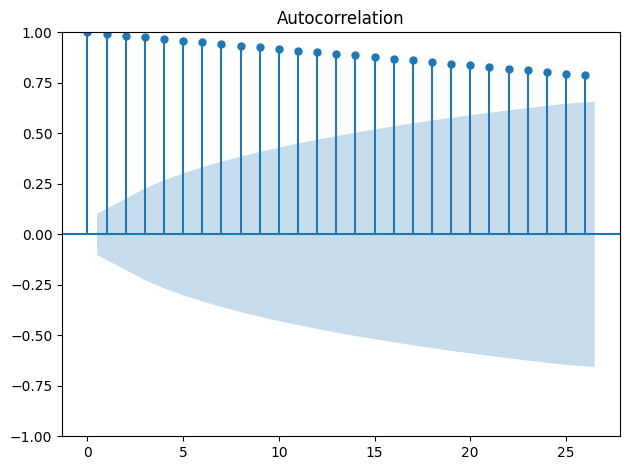

In [23]:
plot_acf(ts)

plt.tight_layout()

plt.show()

The graph shows that as the lag on the This suggests some degree of serial dependence in the data, where past values ​​influence future values, but this influence diminishes as time passes. This suggests some degree of serial dependence in the data, where past values ​​influence future values, but this influence diminishes as time passes.


ARIMA MODEL

In [24]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [25]:
model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.124, Time=1.69 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.60 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.050, Time=0.44 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=0.86 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.31 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.436, Time=1.19 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.24 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.20 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Fri, 07 Jun 2024   AIC                           1839.553
Time:                        21:22:51   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The AIC and BIC values ​​are relatively low (1839.553 and 1855.152, respectively), indicating that the model fits the data well without being overly complex. The coefficients also appear significant, as the associated p-values ​​are very low. Furthermore, no warnings have been detected in the waste diagnostics.

Both models are quite similar in terms of fit metrics, significance of the coefficients, and residual diagnostics. Therefore, the choice between one or the other could depend on additional factors, such as the theoretical interpretation of the model parameters or its simplicity. It is noteworthy that the second model, SARIMAX(1, 0, 1), has a slightly lower AIC (1839.553) compared to the first model, SARIMAX(1, 1, 1) (1839.552). Although the difference is minimal, a lower AIC generally suggests better model fit. Therefore, based on this criterion alone, we could consider the second model to be slightly superior.

In [26]:
pred = model.predict(50)

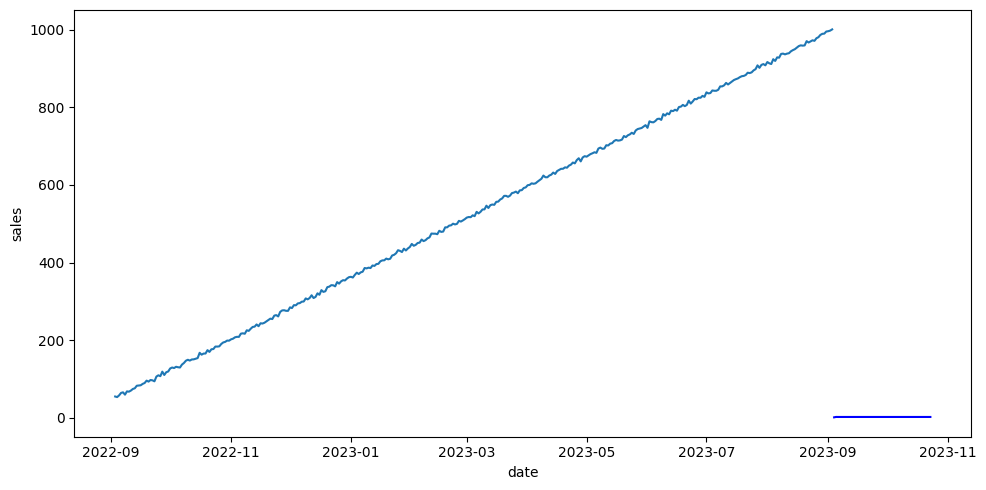

In [27]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = pred, c = "blue")

plt.tight_layout()

plt.show()

Prediction of the model

In [28]:
forecast = model.predict(10)
forecast

2023-09-04    1.675366
2023-09-05    2.673520
2023-09-06    2.591621
2023-09-07    2.598341
2023-09-08    2.597789
2023-09-09    2.597834
2023-09-10    2.597831
2023-09-11    2.597831
2023-09-12    2.597831
2023-09-13    2.597831
Freq: D, dtype: float64

In [29]:
model_stationary = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)  


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.124, Time=1.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.70 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.050, Time=0.34 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.23 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.26 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.436, Time=1.39 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=0.82 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=32.59 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=8.71 sec
 ARIMA(1,0,1)(1,0,0)[12] int

In [30]:
dump(model, open("../models/ARIMA-no-stationary.sav", "wb"))
dump(model_stationary, open("../models/ARIMA-stationary.sav", "wb"))

In [31]:
predictions = model_stationary.predict(50)

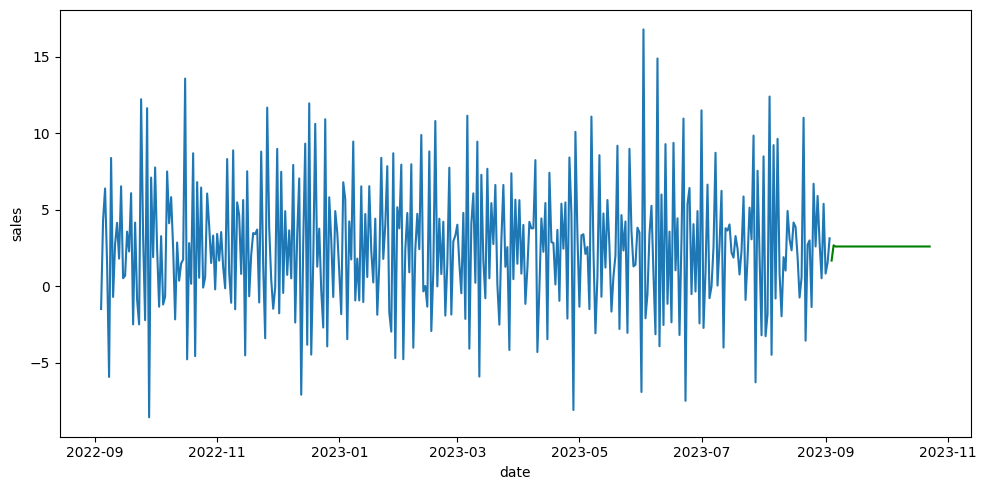

In [32]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = predictions, c = "green")

plt.tight_layout()

plt.show()

In [33]:
model_stationary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Sat, 08 Jun 2024   AIC                           1839.553
Time:                        05:56:22   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\crroj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\crroj\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


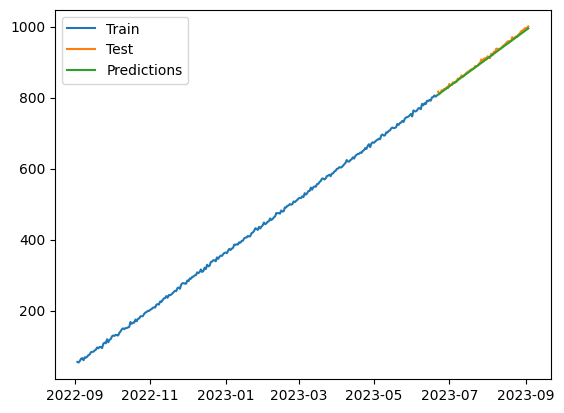

In [36]:
# Validación temporal

train_size = int(len(ts) * 0.8)  # usamos el 80% de los datos para entrenamiento
train, test = ts[0:train_size], ts[train_size:]  # train contiene las primeras train_size (80%) observaciones, test contiene las observaciones restantes después del conjunto de entrenamiento.

# Ajustamos del modelo en el conjunto de entrenamiento
model_val = SARIMAX(train, order=(1, 1, 1))  # Le pasamos el conjunto de entrenamiento (`train`) como los datos y especificamos el orden del modelo SARIMA usando el argumento `order=(1, 0, 1)`. 
# estamos ajustando un modelo SARIMA con un componente autorregresivo de orden 1, un componente de integración de orden 0 y un componente de media móvil de orden 1.
fitted_model = model_val.fit()  # almacenamos el modelo ajustado en una variable

# Evaluamos del modelo en el conjunto de prueba
predictions = fitted_model.forecast(steps=len(test)) # especifica cuántos pasos hacia adelante queremos predecir, en este caso tantos pasos como observaciones hay en el conjunto de prueba.
# forecast(): Este es un método de los modelos SARIMAX ajustados en la biblioteca statsmodels. Este método se utiliza para generar predicciones futuras basadas en el modelo ajustado.
# 

# Comparar predicciones con datos reales
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.show()

CONCLUSION:

We observe that the predictions fit almost perfectly to the test set, suggesting that we are dealing with a model that provides excellent precision in estimating future values.